# EDA - Análise Exploratória de Dados
## Projeto: Análise de Sentimentos em Redes Sociais
Dataset: [Kaggle](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset)
---

## 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

## 2. Carregamento dos Dados

In [2]:
df = pd.read_csv('../data/raw/sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## 3. Visão Geral do Dataset

In [3]:
df.shape

(732, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [5]:
df.describe(include = 'all')

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
count,732.000000,732.000000,732,732,732,732,732,732,732.000000,732.000000,732,732.000000,732.000000,732.000000,732.000000
unique,NaN,NaN,707,279,683,685,4,697,NaN,NaN,115,NaN,NaN,NaN,NaN
top,NaN,NaN,"A compassionate rain, tears of empathy fallin...",Positive,2020-01-05 08:45:00,RainNurturer,Instagram,#Compassionate #TearsOfEmpathy,NaN,NaN,USA,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,44,3,3,258,3,NaN,NaN,59,NaN,NaN,NaN,NaN
mean,366.464481,369.740437,NaN,NaN,NaN,NaN,NaN,NaN,21.508197,42.901639,NaN,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,NaN,NaN,NaN,NaN,NaN,NaN,7.061286,14.089848,NaN,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,10.000000,NaN,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,NaN,NaN,NaN,NaN,NaN,NaN,17.750000,34.750000,NaN,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,43.000000,NaN,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,50.000000,NaN,2023.000000,9.000000,22.000000,19.000000


## 4. Limpeza Inicial

In [6]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore')
# Padronizar rótulos de sentimento
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()
df['Country'] = df['Country'].str.strip().str.title()
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,Usa,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,Usa,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,Uk,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## 5. Análise de Sentimentos

In [7]:
print(df['Sentiment'].unique())
print(df['Sentiment'].value_counts())

['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'
 'Contemplation' 'Joyfulr

In [8]:
top_classes = df['Sentiment'].value_counts().head(10)
print(top_classes)

Sentiment
Positive       45
Joy            44
Excitement     37
Contentment    19
Neutral        18
Gratitude      18
Curiosity      16
Serenity       15
Happy          14
Despair        11
Name: count, dtype: int64


In [9]:
# Cria um dicionário de mapeamento para sentimentos
mapeamento_sentimentos = {
    'Positive': [
        'Positive', 'Joy', 'Admiration', 'Affection', 'Happiness', 'Enjoyment', 'Pride', 'Excitement', 'Gratitude', 
        'Hope', 'Serenity', 'Empowerment', 'Enthusiasm', 'Accomplishment', 'Success', 'Inspiration', 'Confidence', 
        'Kind', 'Amusement', 'Awe', 'Surprise', 'Contentment', 'Fulfillment', 'Relief', 'Friendship', 'Zest', 
        'Playful', 'Free-spirited', 'Inspired', 'Grateful', 'FestiveJoy', 'Overjoyed', 'Heartwarming', 'Satisfaction', 
        'Optimism', 'Radiance', 'Harmony', 'Wonder', 'Marvel'
    ],
    'Negative': [
        'Negative', 'Sadness', 'Anger', 'Fear', 'Disgust', 'Disappointed', 'Bitter', 'Bitterness', 'Shame', 'Despair', 
        'Grief', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Envy', 'Regret', 'Loss', 'Helplessness', 
        'Loneliness', 'Jealousy', 'Intimidation', 'Confusion', 'Numbness', 'Melancholy', 'Hate', 'Bad', 'Heartbreak', 
        'Desolation', 'Isolation', 'Pressure', 'Obstacle', 'Sympathy', 'Challenge', 'Devastated', 'Dismissive', 
        'Sorrow', 'Darkness', 'Desperation'
    ],
    'Neutral': [
        'Neutral', 'Acceptance', 'Reflection', 'Contemplation', 'Curiosity', 'Ambivalence', 'Solace', 'Tranquility', 
        'Immersion', 'Engagement', 'Journey', 'Other', 'Obstacle', 'Support', 'Help', 'Guidance', 'Advice', 'Feedback', 
        'Information', 'Suggestion', 'Observation'
    ]
}

def categoriza_sentimento(sentimento):
    sentimento = sentimento.strip().capitalize()  # garante padronização
    for categoria, lista in mapeamento_sentimentos.items():
        if sentimento in lista:
            return categoria
    return 'Neutral'  # se não encontrar, assume como Neutral

df['Sentiment_Grouped'] = df['Sentiment'].apply(categoriza_sentimento)

# Visualize a contagem por categoria agrupada
print(df['Sentiment_Grouped'].value_counts())

Sentiment_Grouped
Neutral     300
Positive    288
Negative    144
Name: count, dtype: int64


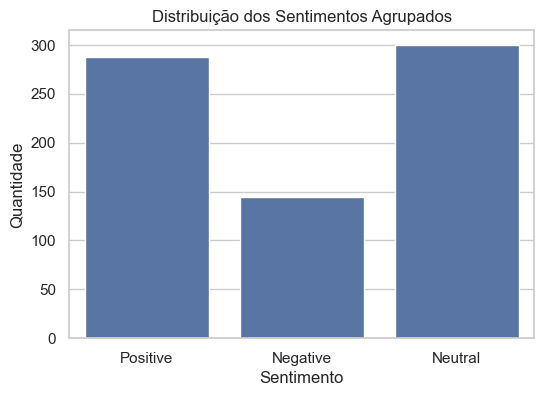

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment_Grouped', data=df, order=['Positive', 'Negative', 'Neutral'])
plt.title('Distribuição dos Sentimentos Agrupados')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()

## 6. Análise de Plataformas e Países

In [11]:
print(df['Platform'].unique())

[' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']


In [12]:
print(df['Country'].unique())

['Usa' 'Canada' 'Uk' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']


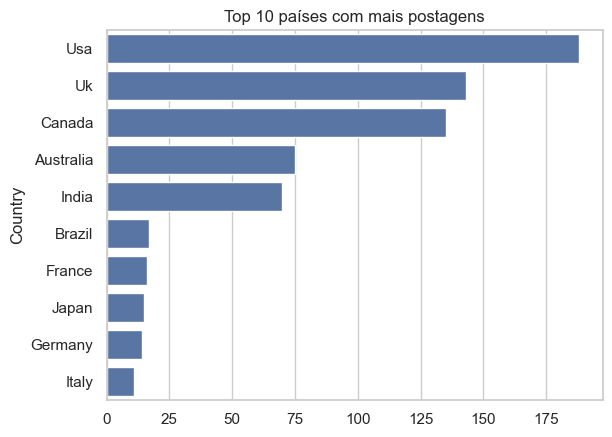

In [13]:
top_paises = df['Country'].value_counts().head(10)
sns.barplot(x=top_paises.values, y=top_paises.index)
plt.title('Top 10 países com mais postagens')
plt.show()

## 7. Análise de Likes e Retweets

In [14]:
df[['Retweets', 'Likes']].describe()

,Retweets,Likes
count,732.000000,732.000000
mean,21.508197,42.901639
std,7.061286,14.089848
min,5.000000,10.000000
25%,17.750000,34.750000
50%,22.000000,43.000000
75%,25.000000,50.000000
max,40.000000,80.000000


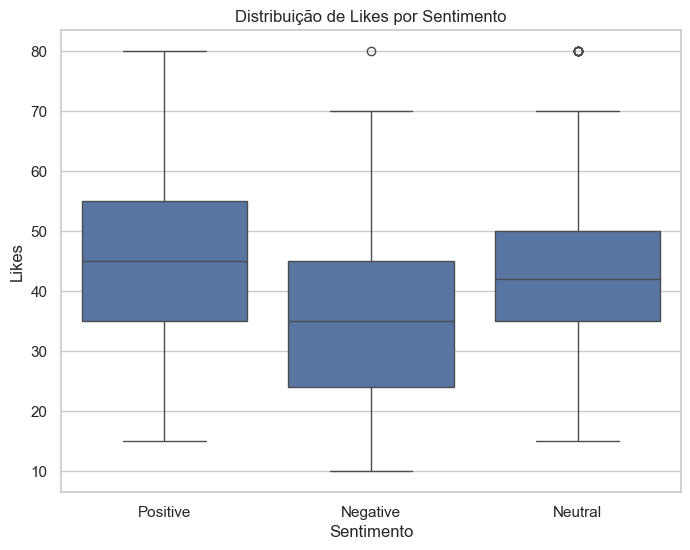

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sentiment_Grouped', y='Likes', data=df, order=['Positive', 'Negative', 'Neutral'])
plt.title('Distribuição de Likes por Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Likes')
plt.show()

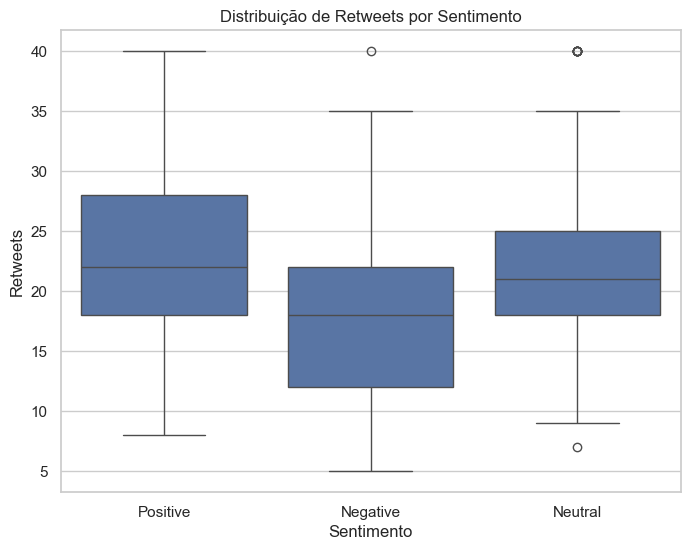

In [16]:
# Boxplot de Retweets por Sentimento
plt.figure(figsize=(8,6))
sns.boxplot(x='Sentiment_Grouped', y='Retweets', data=df, order=['Positive', 'Negative', 'Neutral'])
plt.title('Distribuição de Retweets por Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Retweets')
plt.show()

## 8. Salvando o DataFrame Tratado

In [18]:
df.to_csv('../data/processed/sentimentdataset_tratado.csv', index=False)